# Taller de Python: Complejidad Social y Modelos Computacionales
## Lección Py.7 Modelos basados en agente con Python
### Impartido por: Gonzalo Castañeda
Basado en: (i) Sayama Hiroki, Introduction to the Modeling and Analysis of Complex Systems.
    Binghamton University, State University of New York, Chap. 19 Agent based models
    https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Book%3A_Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)
    (ii) Bill Thompson y Limor Raviv. Tutorial sobre ABMs. Parte II
    Las notebooks de este tutorial estan disponibles en: 
        https://github.com/Limor-Raviv/Tutorial_Agent_Based_Models

Descripción gráfica de un ABM
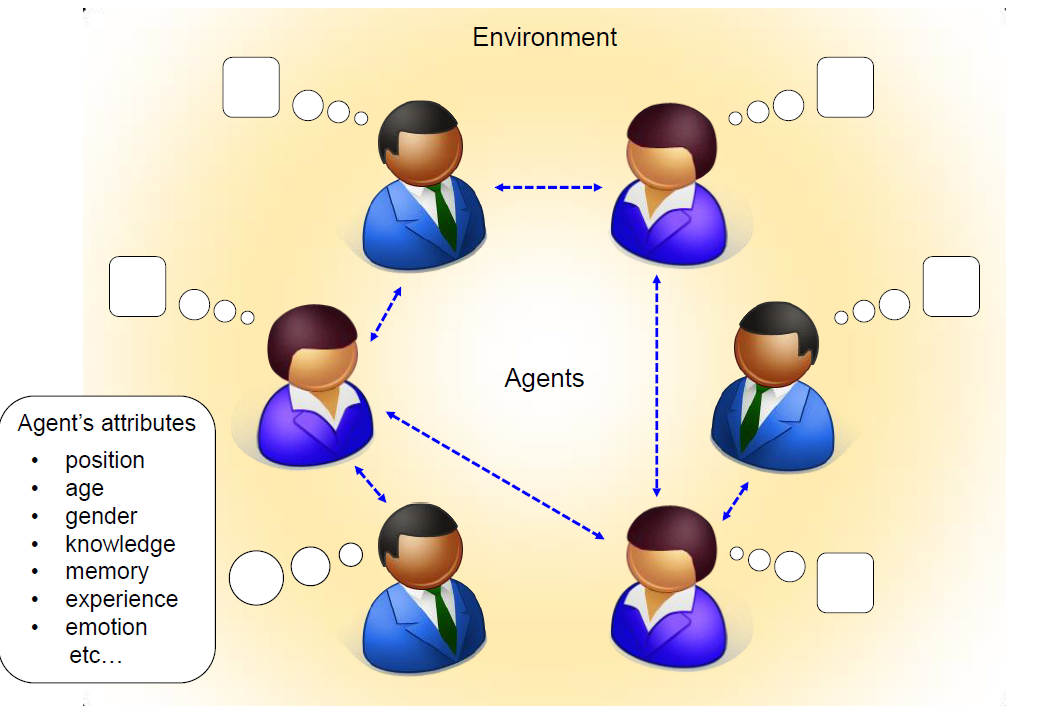

Los ABM son representaciones virtuales de los agentes que integran a una sociedad y que tienen
la capacidad de generar su comportamiento colectivo. Por su naturaleza permiten estudiar los efectos que, en estos comportamientos colectivos, tienen modificaciones en parámetros, condiciones iniciales, topologías de interacción y reglas de comportamiento individual.

Propiedadades de los agentes en un sistema complejo:
    
 Agentes son entidades discretas.
 Agentes pueden presentar estados internos.
 Agentes pueden estar espacialmente posicionados.
 Agentes pueden percibir e interactuan con el entorno.
 Agentes pueden comportarse en base a reglas predefinidas.
 Agentes pueden aprender y adaptarse.
 Agentes pueden interactuar con otros gentes.
 ABMs suelen carecer de un controlador central.
 ABMs pueden producir comportamientos colectivos no anticipados.

Pasos requeridos en la construcción de un ABM

1. Especificar el problema a ser resuelto por un ABM
2. Diseñar a los agentes y sus atributos (datos) estáticos y dinámicos
3. Diseñar el entorno con el que los agentes interactúan
4. Diseñar el comportamiento de los agentes y sus procesos de aprendizaje
5. Diseñar la topología de interacción y los procesos de interdependencia
6. Diseñar la visualización del espacio de interacción y de los comportamientos colectivos
7. Diseñar los procesos de análisis de sensibilidad
8. Diseñar los mecanismos de validación externa a través de regularidades estadísticas
9. Diseñar los procesos de experimentación con contrafactuales

Para que un ABM tenga un sentido cientifico tiene que construirse a partir de uno de estos enfoques:
A. Construir el ABM a partir de supuestos con validez empírica para el fenómeno bajo estudio, y a 
partir de ahí generar comportamiento colectivos previamente desconocidos. ==> aquí lo que queremos
explicar es qué tipo de fenómeno puede producirse bajos ciertas condiciones con relevancia empírica
(el output descnocido)

B  Construir el ABM a partir de supustos hipotéticos, y reproducir con la simulación comportamientos colectivos empíricamente observados. ==> aqui lo que queremos es descubrir qué tipo de condiciones
iniciales y comportamiento individuales pueden generar comportamientos macroscópicos empíricos (el input desconocido)

C. Construir el ABM mediante supuestos con validez empírica para el fenómeno bajo estudio, y a 
partir de ahí generar comportamiento colectivos virtuales que repliquen regularidades estadísticas
observadas.    ==> aquí lo que queremos entender son los mecanismos causales (causalidad desconocida)


## (1) Simulación de una caminata aleatoria bidimensional 

Veamos un ABM muy sencillo: caminata aleatoria bidimensional usando el formato de tres pasos descrito en Hiroki Sayama (inicializar, observar y actualizar).  Notar que en este caso no hay interaccion entre los agentes, solamente movimientos aleatorios.
Asimismo, en este algoritomo, los agentes se crean en una función en la que se establece una lista para los atributos de los agentes -coordenadas (x, y) en el espacio- y otra lista para almacenar a toda la población de agentes.

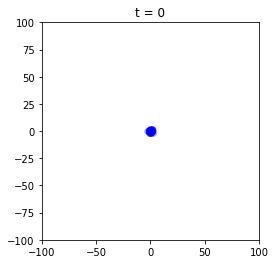

In [1]:
from pylab import *                               # Importamos librería de graficación
populationSize = 100                              # Variables a nivel agregado
noiseLevel = 1

# primer paso: inicializa
def initialize():
    global time, agents                            # variables globales que pueden cambiarse
                                                   # dentro y fuera de las funciones
    time = 0
    agents = []                                    # Listado para la población de agentes
    for i in range(populationSize):
        newAgent = [normal(0, 1), normal(0, 1)]    # Creamos una lista con dos coordendas aleatorias
        agents.append(newAgent)                    # Creamos una lista de listas al agregar
                                                   # a los agentes a la población
# Segundo paso: visualiza
def observe():
    cla()                                           # se limpian los plots de pasos previos
    x = [ag[0] for ag in agents]                    # x es una lista de las coordenadas eje x
    y = [ag[1] for ag in agents]                    # y es una lista de las coordenadas eje y
    plot(x, y, 'bo', alpha = 0.2)                   # hacemos la gráfica en espacio bidimensional
    axis('scaled')                                  # define escalas de datos
    axis([-100, 100, -100, 100])                    # limites de las gráficas
    title('t = ' + str(time))                       # va a aparecer el tiempo

# Tercer paso: actualiza
def update():
    global time, agents
    time += 1                      # Actualizamos debido a que t aparece en la gráfica en c/periodo
                                             # Establecemos la caminata aleatoria
    for ag in agents:
        ag[0] += normal(0, noiseLevel)       # el nivel de ruido se determina con desviación estándar
        ag[1] += normal(0, noiseLevel)

# Paso: invocamos funciones y graficamos espacio inicial
initialize()
observe()


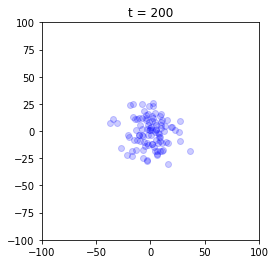

In [2]:
# Paso: visualización del espacio 50 periodos adelante
for i in range(200):
     update()
     observe()
     

## (2) Definición de atributos mediante clases: una primera aproximación

Por la naturaleza de Python es conveniente definir el comportamiento (métodos) y atributos (datos) de 
los agentes de un ABM a partir de una clase, como en los lenguajes orientados a objetos.
Sin embargo, para simplificar el código, una alternativa es usar el esquema de clases solo para 
crear estructuras de datos en donde se almacenen los atributos de los agentes.

In [3]:
# El algoritmo quedaría de la siguiente manera:
# Para crear agentes (objetos de un cierto tipo) hacemos referencia al comando class
class Agent:
    pass                 # Usamos pass ya que no queremos hacer explícito el diseño de métodos
                         # para este tipo de objetos
# Para crear el agente invocamos a la clase, como lo hacemos con las funciones
a = Agent()

# De esta manera ya podemos crear variables asociadas a este agente, por lo que la clase a
# describe una estructura de datos sencilla 
a.x = 2
a.y = 8
a.name = 'John'
a.age = 21

In [4]:
print('la coordenada en el eje x del agente es:', a.x)
print('el nombre del agente es:', a.name)
print('la edad del agente es:', a.age)

la coordenada en el eje x del agente es: 2
el nombre del agente es: John
la edad del agente es: 21


In [5]:
# Este esquema da una flexibilidad similar a la de los diccionarios.
# Si queremos saber que atributos tiene el agente a
dir(a)
# A parte de los métodos propios de cualquier clase aparecen al final las 4 variables recién 
# creadas. 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'name',
 'x',
 'y']

## (3) Modelo de segregación de schelling con vecindades continuas

El popósito del modelo de segregación es mostrar, en un sistema social, que el comportamiento 
individual (tolerancia) discrepa del comportamiento colectivo (segregación). Con este fin se crea
una retícula bidimensional en el que se posicionan los individuos y se analiza si los vecinos 
en el barrio son afines (mismo color), si se rebasa el nivel de tolerancia establecido de manera
exógena la persona se mueve a otro barrio elegido al azar. Este proceder no garantiza que se llegue 
a un equilibrio en el que ninguna persona quiere cambiar de barrio.

En la versión tradicional las vecindades o barrios se establecen de manera discreta considerando
vecindades de tipo Moore, pero en la versión continua se define un radio de cobertura determinado
y coordenadas de posicionamiento de los agentes a partir de números reales acotados por el 
intervalo cerrado [0, 1].
Ambas versiones se encuentran disponibles en el github de Hiroki Sayama: https://github.com/hsayama/PyCX/:  abm-segregation-continuous.py , abm-segregation-discrete.py 

In [6]:
# Importamos librerias y definimos parámetros
from pylab import *
n = 1000 # número de agentes
r = 0.1 # radio de la vecindad
th = 0.5 # umbral de tolerancia

Con la clase diseñamos una estructura de datos para el agente en donde almacenar sus atributos. 
En este caso los atributos corresponden a sus coordenadas en un espacio unitario 2-D y a su tipo
(punto de  color), la que puede definirse con un valor binario {0, 1}.

In [7]:
# Establecemos la clase a como una estructura de datos (objeto)
class Agent:
    pass

# Primer paso, inicializamos el modelo
def initialize():
    global agents                 # Creamos una variable global que puede ser leída en otras funciones
    agents = []                   # Aquí se van a enlistar todos los agentes
    for i in range(n):            # Creamos para los n agentes sus atributos
        ag = Agent()              # Creamos los agentes
        ag.type = randint(2)      # Especificamos su tipo
        ag.x = random()           # Su posición se genera con un número aleatorio entre 0 y 1
        ag.y = random()
        agents.append(ag)         # agregamos los agentes a la lista
                            # Ojo como no son instancias distintas de una clase (ag1, ag2,...,) 
                            # agrupamos a los distintos agentes en una lista

In [8]:
# Segundo paso, visualizacion del espacio bidimensional
def observe():
    global agents
    cla()                                            # limpiamos los ejes de las gráficas
                      # Creamos nuevas listas 'red' y 'blue' para diferenciar a tipos de agentes
    red = [ag for ag in agents if ag.type == 0]      # definimos como red a los agentes de tipo 0
    blue = [ag for ag in agents if ag.type == 1]     # definimos como blue a los agentes de tipo 1
    plot([ag.x for ag in red], [ag.y for ag in red], 'ro')    # graficamos a los red
    plot([ag.x for ag in blue], [ag.y for ag in blue], 'bo')  # graficamos a los blue en función
                                                              # de coordenadas aleatoria
    axis('image')                                     # Establecemos una gráfica cuadrada
    axis([0, 1, 0, 1])                                # limites de los ejes de las gráficas
                                    # Ojo: como ag son instancias de una clase se pueden leer
                                    # sus datos en distintas partes del algoritmos

In [9]:
# Tercer paso, actualización de comportamientos
def update():
    global agents
    ag = choice(agents)   # seleccionamos un agente al azar (choice y random() son métodos de python)
                          # establecemos la vecindad de los agentes alrededor de ag que se
                          # posicionan en una distancia menor al radio establecido
    neighbors = [nb for nb in agents
                 if (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < r**2 and nb != ag]
    if len(neighbors) > 0:     # Cuando la vecindad tiene al menos un agente vecino
                         # contabilizamos todos los agentes de su tipo y sacamos fracción          
        q = len([nb for nb in neighbors if nb.type == ag.type]) \
            / float(len(neighbors))
        if q < th:                              # si la fracción es menor que el umbral. movemos 
            ag.x, ag.y = random(), random()     # al agente a otra posición entre 0 y 1

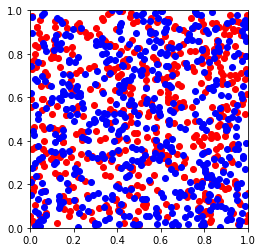

In [10]:
# Invocamos las funciones para inicializar y visualizar el espacio unitario 2-D
# con los distintos tipos de agente
initialize()
observe()

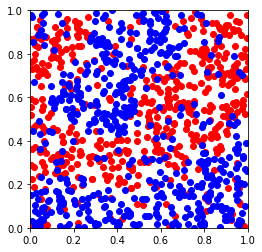

In [11]:
# Hacemos la simulación y presentamos el resultado de segregación que se produce en el 
# periodo de iteración 2,000
for i in range(2000):
     update()
observe()

## (4) Modelo de segregación con vecindades discretas

In [12]:
# Definición de parámetros
width = 50            # celdas (lotes) en la reticula (comunidad)
height = 50
density = 0.8         # porcentaje de lotes ocupados
threshold = 0.7       # umbral de tolerancia
# Ojo en esta segunda versión no usaremos clases

In [13]:
# Paso de inicialización

def initialize():
    global time, config, agents, empty
    agents = []         # listado de la población
    empty = []          # listado de celdas vacías (lotes)
    time = 0  
    config = zeros([height, width])   # matrix de ceros de dimensiones: altura x anchura 
                                      # este arreglo lo usamos para la configuración del espacio
                                      # barremos el espacio con un loop para asignar su tipo
                                      # y existencia de lotes vacios
    for x in range(width):
        for y in range(height):
            if random() < density:      # posicionamiento aleatorio de agentes en los lotes
                agents.append((y, x))
                if random() < 0.5:      # definición de tipos de agentes (1 , -1) en un mismo %
                    config[y, x] = 1
                else:
                    config[y, x] = -1
            else:
                empty.append((y, x))     # los lotes vacios se agregan a la lista empty

In [14]:
# Paso de visualización
def observe():
    cla()                                                # Se limpia imagen en cada periodo
    imshow(config, vmin = -1, vmax = 1, cmap = cm.bwr)   # Se transforman dígitos en imágenes
    axis('image')
    title('t = ' + str(time))                            # Se especifica en título periodo iteración

In [15]:
# Paso de actualización
def update():
    global time, config, agents, empty       # por convención incluimos todas las globales
    time += 1                                # Se acatualiza el periodo
    sequence = list(range(len(agents)))      # Se establece una lista del tamaño de la población
    shuffle(sequence)             # método de aleatorización que mueve los números de la lista al azar
    for i in sequence:                  # Ojo: en sequence solo hay el índice que identifica al agente
        y, x = agents[i]                # seleccionamos a todos los agentes, ordenados al azar
                                        # recordar que en agents hay tuplas con sus coordenadas
        state = config[y, x]            # definimos su tipo en state ya que en cofig tenemos el
                                        # tipo de agente a partir de sus coordenadas
        similar = 0
        total = 0                       # Esta variable mide el número de vecinos en el barrio
        for dx in range(-1, 2):         # hacemos la contabilidad de los vecinos del mismo tipo
            for dy in range(-1, 2):     # en un radio de un cuadro (arriba, abajo, derecha, izquierda)
                if not ((dx == 0) and (dy == 0)):    #descartamos a la celda central
                    v = config[(y + dy) % height, (x+dx) % width] # consideramos fronteras periodicas
                    if (v != 0):        # descartamos que no sea un lote vacío
                        total += 1      # sumamos total de vecinos
                    if (v == state):    # sumamos vecinos iguales
                        similar += 1
        if (similar < threshold * total):  # si el número de vecinos queda por debajo del umbral
            j = randint(len(empty))        # elejimos uno de los lotes vacíos
            new_y, new_x = empty[j]        # le damos sus coordenadas a partir del índice
            agents[i] = (new_y, new_x)     # asignamos sus nuevas coordenadas
            config[new_y, new_x] = state   # asignamos su estado
            empty[j] = (y, x)              # una vez que se muda, definimos a las coordenadas 
                                           # anteriores como parte de los lotes vacios
            config[y, x] = 0               # especificamos que el estado de ese lote es cero

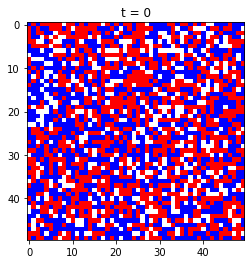

In [16]:
# Invocamos las funciones para inicializar y visualizar el espacio unitario 2-D
# con los distintos tipos de agente
initialize()
observe()

Notar que en el sembrado inicial los agentes están mezclados aleatoriamente (rojos y azules); es decir los barrios son integrados (color blanco = lote vacío)

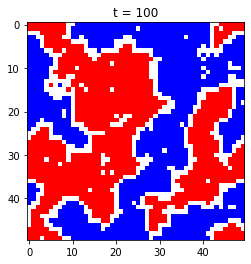

In [17]:
# Hacemos la simulación y presentamos el resultado de segregación que se produce en el 
# periodo de iteración 100
for i in range(100):
     update()
     observe()

Después de 100 iteraciones se observa una situación de segregación entre rojos
y azules. Es decir, se habla de un proceso de emergencia en el que se
produce un equilibrio desafortunado a pesar de que los agentes individuales tienen un
comportamiento de tolerancia

## (5)  Modelo de diseminación de concepciones (ideas)

En este modelo se plantean agentes heterogeneos que difieren en dos atributos, uno de ellos es 
una concepción, idea, o punto de vista sobre un tema, y el otro es una predisposición a cambiar sus 
puntos de vistas. Ambos atributos se definen de manera aleatoria al iniciar la simulación,
pero solo la concepción es un atributo mutable. Es decir, algunos agentes son flexibles y 
pueden cambiar sus ideas, y el resto son tercos y se mantienen firmes en sus concepciones.
En este modelo se dan interacciones aleatorias entre parejas de agentes, en las que pueden actuar
como transmisores o receptores de las ideas. En un momento dado el receptor es el que absorbe la idea
del transmisor.
No existe en el modelo una topología de interacción como en los autómatas celulares o como
en el modelo de Schelling. En este sentido se dice que las interacciones se dan en un proceso de
emparejamiento aleatorio --como se supone implícitamente en los sistemas de ecuaciones diferenciales--
En términos algorítmicos, el modelo apela al uso de lista de listas para crear a la población de 
agentes y para almacenar su atributos en el conjunto de listas anidadas, como lo vimos en otros
ejemplos.
También ilustramos que en Python es muy sencillo crear simulaciones de Monte Carlos, en donde
el proceso dinámico del sistema se simula varias veces para tomar en cuenta los factores aleatorios
de una sola corrida.
Por último, el algoritmo nos muestra la manera en que se pueden realizar análisis de sensibilidad,
en los que se modifican los parámetros de los modelos y, de esta manera, poder determinar si
estos parámetros inciden en la regularidad estadística observada en las simulaciones.

Este modelo fue diseñado por Bill Thompson y Limor Raviv. y se presenta en la Parte 2 de su tutorial
sobre ABMs. Las notebooks de este tutorial estan disponibles en: 
https://github.com/Limor-Raviv/Tutorial_Agent_Based_Models

(i) Paso de inicialización: en este segmento del algoritmo se definen los atributos de los agentes, fijos y mutables; se crea la población de agentes heterogéneos mediante sembrados aletorios, y se definen las variables macroscópicas a estudiar en el análisis

In [18]:
import random
# Definición de parámetros del ABM
vowels = ['a', 'i']        # las vocales son los dos atributos mutables que existen en la población
personalities = ['F', 'S'] # Las personalidades son las predisposiciones a cambiar de idea
                           # F= Flexible --dispuesto a cambiar--  S=Stubborn --terco--

In [19]:
# los dos atributos de los agentes se definen en una lista
# Establecemos una función para crear agents a partir de los dos atributos
def make_agent(vowel, personality):
    return [vowel, personality]         # lista con los atributos de cada agente

# Por ejemplo, a partir de la función creamos un agente del tipo flexible que presenta la vocal 'i' 
agent_one = make_agent(vowels[1], personalities[0])
print(agent_one)

['i', 'F']


In [20]:
# Creamos una función que genera una población de N agentes con parámetros seleccionados al azar
# para lo cual usamos el método 'random.randint()'
def make_population(N):  
    population = []                               # Notar que la población también es una lista  
    for i in range(N):                                   # Creamos la población    
        v = random.randint(0,1)                          # Especificamos al azar los atributos        
        p = random.randint(0,1)      
        agent = make_agent(vowels[v], personalities[p])  # invocamos la creación de agentes      
        population.append(agent)
    return population

# Invocamos la función para establecer una población de 8 integrantes 
pop = make_population(8)
print(pop)

[['a', 'S'], ['a', 'F'], ['a', 'F'], ['i', 'S'], ['i', 'S'], ['a', 'F'], ['i', 'S'], ['i', 'F']]


In [21]:
# Creamos una función que calcula la proporción de agentes con la variante 'a' en la pobación
# Este tipo de variables reflejan el comportamiento macroscópico de la población, y por lo tanto
# son las variables  a analizar en los ABMs.
def count(population):
    t = 0.                         # definimos un número de punto flotante para el índice     
    for agent in population:
        if agent[0] == 'a':
            t += 1                 # hacemos el conteo
    return t / len(population)     # dividimos entre el total de la población

(ii) Paso de interacción: en este segmento se establece el emparejamiento aleatorio entre agente; es
decir, se hace caso omiso de una topología. Asimismo, se define la manera en que actúa cada
agente (transmisor o receptor de la idea). Esta característica no se considera en el modelo como
un atributo de los agentes ya que estas facultades se definen en el momento en que ocurren las 
interacciones.

In [22]:
# Invocamos la función para crear una población con 20 agentes aleatorios
# y calculamos cuál es la proporcion de sus inegrantes con la variante 'a'
prop_a = count(make_population(20))
print('La proporción de [a] en la población es', prop_a)

La proporción de [a] en la población es 0.55


In [23]:
# from numpy.random import choice
# Recordar que Python tiene rutinas de funciones aleatorias en diferentes librerías
# Escogemos al azar la pareja de agentes de la lista -población- que van a interactuar
def choose_pair(population):
    i = random.randint(0, len(population) - 1) 
    j = random.randint(0, len(population) - 1)    
    while i == j:                                    # Checamos que no se haya elegido el mismo índice                   
        j = random.randint(0, len(population) - 1)   # si los agentes son iguales, elegimos otro j   
    return population[i], population[j]

# Chequemos que el algoritmo hace efectivamente lo deseado
# Si corremos esta celda varias veces podemos observar la selección de parejas al azar
pop = make_population(8)
listener, producer = choose_pair(pop)        # la primera selección es el que recibe
                                             # la segunda selección es el que transmite
print('La población es', pop)
print('Esta es la pareja elegida', listener, producer)
print('El que escucha es', listener)
print('El productor es', producer)

La población es [['i', 'F'], ['a', 'F'], ['i', 'F'], ['i', 'S'], ['a', 'S'], ['i', 'S'], ['a', 'S'], ['i', 'S']]
Esta es la pareja elegida ['i', 'S'] ['i', 'S']
El que escucha es ['i', 'S']
El productor es ['i', 'S']


In [24]:
from copy import deepcopy    # Importamos esta librería para hacer posible el mecanismo de copiado
                             # de atributos
def interact_test(listener,producer):   
    if listener[0] == producer[0]:
        return listener # si el receptor y el que transmite tienen la misma vocal, no hay cambio
    else:
        if listener[1]=='S':
            return listener # si el que recibe es terco, no hay cambios
        else:
            listener[0]=deepcopy(producer[0])   # El transmisor envia la idea  y es recibida
            return listener                     # Notar que no igualamos listener con producer
                # porque no queremos vincular a estos dos agentes (i.e., que ocupen el mismo 
                # espacio en la memoria). Con deepcopy solo copiamos el atributo sin necesidad
                # de que los dos agentes sean el mismo objeto.           

In [25]:
# Para checar que funciona la rutina: seleccionamos la pareja de agentes
randomlistener, randomproducer = choose_pair(make_population(8))
print('El que recibe es', randomlistener)
print('El transmisor es', randomproducer)

# Se produce la interaccióm
updated_listener = interact_test(randomlistener, randomproducer)
print('Después de la interacción el que escucha es',updated_listener)

El que recibe es ['a', 'F']
El transmisor es ['i', 'F']
Después de la interacción el que escucha es ['i', 'F']


In [26]:
# Creamos una función más compacta que actualiza a los agentes usando 'pass' (i..e, no hacer nada)
def interact(listener,producer): 
    
    if listener[0] == producer[0]:
        pass   # no se hace nada
    else:
        if listener[1]=='S':
            pass
        else:
            listener[0]=deepcopy(producer[0])

(iii) Simulación simple:en este segmento corremos varias iteraciones del modelo para hacer posible k procesos de interacción aleatorio entre agentes, y como éstas se dan de manera secuencial se puede pensar que ocurren en diferentes periodos de tiempo.

In [27]:
# Creamos una función que simula una población de tamaño N que interactúa al azar k veces
def simulate(n, k):  
    population = make_population(n)
    print("Población inicial:", population)  
    proportion = []   # hacemos una lista vacía para registrar las proporciones de cada interacción   
    for i in range(k):                 # hacemos k selecciones de parejas de la población       
        pair = choose_pair(population)        
        interact(pair[0],pair[1])      # hacemos que interactúen       
        proportion.append(count(population)) # registramos la proporción de las vocales en la
                                             # población en cada interacción  
    return population, proportion

Población inicial: [['a', 'S'], ['i', 'S'], ['a', 'S'], ['i', 'S'], ['i', 'S'], ['i', 'S'], ['a', 'S'], ['a', 'S'], ['a', 'F'], ['a', 'S'], ['a', 'S'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['a', 'S'], ['i', 'S']]
Población final: [['a', 'S'], ['i', 'S'], ['a', 'S'], ['i', 'S'], ['i', 'S'], ['i', 'S'], ['a', 'S'], ['a', 'S'], ['i', 'F'], ['a', 'S'], ['a', 'S'], ['i', 'S'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['a', 'S'], ['i', 'S']]


(0.0, 1.0)

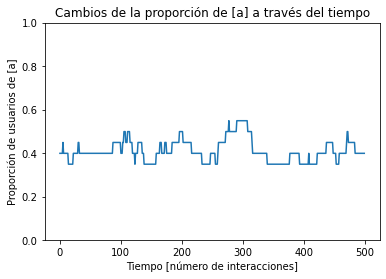

In [28]:
# Invocamos a la función anterior, por lo que simulamos 500 interacciones entre 20 agentes 
new_population, proportion = simulate(20, 500)
print("Población final:", new_population)
# Hacemos una gráfica de los cambios en la proporción de 'a' a través de las interacciones
 
#%matplotlib inline 
#put plot in the notebook
import matplotlib.pyplot as plt # importamos la librería
plt.plot(proportion)

# agregamos detalles a la gráfica
plt.title('Cambios de la proporción de [a] a través del tiempo')
plt.ylabel('Proporción de usuarios de [a]')
plt.xlabel('Tiempo [número de interacciones]')
plt.ylim(0,1)

Notar que en este comportamiento macroscópico no se detecta algún patrón de convergencia,
más alla de mostrar ciertas oscilaciones alrededor de 0.5. En otras palabras, aunque el 50%
del sembrado inicial de agentes corresponda a los flexibles, ello no significa que alguna concepción
va a dominar en la población.

Población inicial: [['a', 'F'], ['i', 'F'], ['i', 'S'], ['i', 'F'], ['a', 'S'], ['i', 'S'], ['i', 'S'], ['a', 'F'], ['a', 'F'], ['i', 'F'], ['a', 'S'], ['a', 'F'], ['a', 'F'], ['a', 'F'], ['a', 'F'], ['a', 'F'], ['a', 'F'], ['a', 'S'], ['i', 'F'], ['a', 'S'], ['a', 'S'], ['a', 'S'], ['a', 'S'], ['a', 'S'], ['a', 'F'], ['a', 'F'], ['a', 'S'], ['a', 'F'], ['a', 'S'], ['i', 'S'], ['a', 'S'], ['a', 'S'], ['i', 'S'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['i', 'S'], ['a', 'S'], ['a', 'F'], ['a', 'S'], ['a', 'F'], ['i', 'F'], ['i', 'S'], ['a', 'S'], ['i', 'F'], ['a', 'S'], ['a', 'F'], ['a', 'S'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['i', 'F'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['a', 'S'], ['a', 'F'], ['i', 'F'], ['a', 'F'], ['a', 'F'], ['a', 'S'], ['a', 'S'], ['a', 'S'], ['a', 'S'], ['a', 'S'], ['a', 'S'], ['a', 'S'], ['a', 'S'], ['i', 'S'], ['i', 'F'], ['i', 'F'], ['a', 'S'], ['i', 'F'], ['i', 'F'], ['i', 'S'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['i', 'F'], ['a', 'F'], ['a', 'S'], ['a', 'S

(0.0, 1.0)

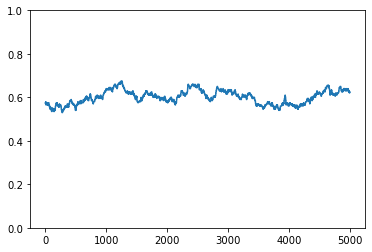

In [29]:
# Simulamos 5000 interacciones entre 200 agentes
new_population, proportion = simulate(200, 5000)

# Make a plot of the changes in proportion of 'a' over interactions 
print('   ')
print('Cambios en la prporción de [a] a través del tiempo')
plt.plot(proportion)
plt.ylim(0,1)

Aunque aumentemos el número de interacciones no se produce convergencia de ideas. Este resultado
se debe en gran medida a que en este modelo no existe una topología de interacción.

(iv) Simulaciones de Monte Carlo: debido a los factores aleatorios del modelo (la creación inicial de 
atributos, la selección de parejas que interactúan), el modelo se corre 's' veces. De esta
manera se puede analizar si los resultados observados se deben a condiciones iniciales 
o alguna contingencia que se presenta a lo largo de cada corrida

In [30]:
# Creamos una función que corre s simulaciones de una población de tamaño n
# que interactúan al azar en k ocasiones
def batch_simulate(n,k,s):
    batch_proportions=[]            # en esta nueva lista almacenamos lo que pasa en cada simulación
    for i in range(s):
        new_population, proportion = simulate(n, k)
        batch_proportions.append(proportion)
    return batch_proportions      

Población inicial: [['a', 'F'], ['a', 'F'], ['a', 'F'], ['i', 'S'], ['a', 'S'], ['i', 'F'], ['i', 'F'], ['i', 'S'], ['a', 'S'], ['i', 'F'], ['a', 'S'], ['i', 'S'], ['i', 'S'], ['i', 'F'], ['a', 'S'], ['a', 'S'], ['a', 'F'], ['a', 'S'], ['i', 'S'], ['i', 'S'], ['a', 'S'], ['i', 'F'], ['i', 'S'], ['a', 'F'], ['i', 'S'], ['a', 'S'], ['a', 'S'], ['a', 'F'], ['a', 'F'], ['a', 'F'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['a', 'S'], ['i', 'S'], ['i', 'S'], ['i', 'F'], ['i', 'F'], ['a', 'S'], ['a', 'S'], ['i', 'F'], ['a', 'S'], ['a', 'F'], ['i', 'F'], ['i', 'S'], ['i', 'S'], ['i', 'S'], ['a', 'S'], ['a', 'S'], ['i', 'S'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['i', 'F'], ['a', 'S'], ['i', 'F'], ['a', 'F'], ['a', 'S'], ['a', 'F'], ['a', 'F'], ['i', 'F'], ['a', 'S'], ['i', 'F'], ['i', 'F'], ['i', 'S'], ['i', 'S'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['a', 'F'], ['i', 'F'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['a', 'S'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['a', 'S'], ['a', 'S'], ['i', 'F

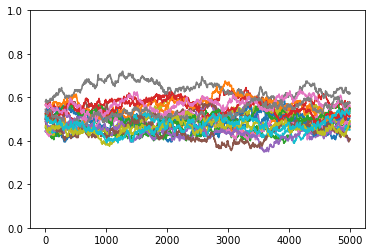

In [31]:
# Hacemos 20 simulaciones de 5,000 interacciones entre 200 agentes
results = batch_simulate(200,5000,20)
plt.ylim(0,1)
for i in results:
    plt.plot(i)

(v) Simulaciones para análisis de sensibilidad: segmento del algoritmo en que se modifican
    parámetros del modelo (e.g., porcentaje inicial de tercos) para analizar si estos valores
    inciden en las regularidades observadas

In [32]:
# Modificamos la función para crear la población de n agentes de tal forma que se especifique
# un cierto número de tercos
def make_population_biased(N,st):
    population = []   
    for i in range(st):                    # Los primeros st agentes son tercos        
        v = random.randint(0,1)        
        agent = make_agent(vowels[v], personalities[1])       
        population.append(agent)   
    for i in range(N-st):                  # Los últimos N-st  agentes son flexibles      
        v = random.randint(0,1)      
        agent = make_agent(vowels[v], personalities[0])       
        population.append(agent)
    return population

# Modificamos la función de simulación para que en las corridas se use la población sesgada
 
def simulate_biased(n, k, st):  #st=no. de tercos   
    population = make_population_biased(n,st)   
    # print("Población inicial:", population)   
    proportion = []    
    for i in range(k):       
        pair = choose_pair(population)       
        interact(pair[0],pair[1])        
        proportion.append(count(population))   
    return population, proportion

Cambios en la proporción de [a] a través del tiempo


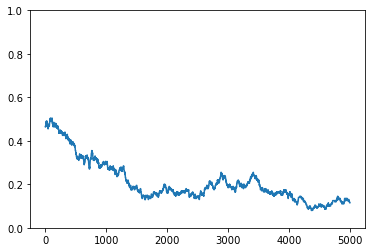

In [33]:
# Corremos una simulación de una población sin agentes tercos
new_population, proportion = simulate_biased(200, 5000, 0)
print('Cambios en la proporción de [a] a través del tiempo')
plt.ylim(0,1)
plt.plot(proportion)

Notemos que la ausencia de tercos da lugar a mayores osclaciones, pero no a un patrón de convergencia
de ideas. En promedio se mantiene el mismo porcentaje de ideas (vocales)

Cambios en la proporción de [a] a través del tiempo


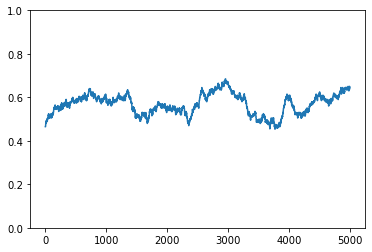

In [34]:
# Corremos una simulación de una población con 1 agente terco
new_population, proportion = simulate_biased(200, 5000, 1)
print('Cambios en la proporción de [a] a través del tiempo')
plt.ylim(0,1)
plt.plot(proportion)

Cambios en la proporción de [a] a través del tiempo


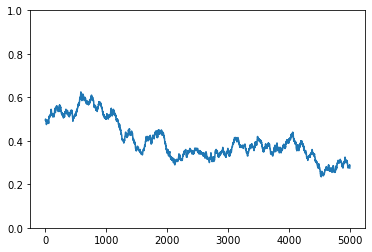

In [35]:
# Corremos una simulación de una población con 1 agente terco
new_population, proportion = simulate_biased(200, 5000, 2)
print('Cambios en la proporción de [a] a través del tiempo')
plt.ylim(0,1)
plt.plot(proportion)

In [36]:
# Modificamos la función de simulaciones en bloque de poblaciones sesgadas


def batch_simulate_biased(n,k,s): #n = tamaño población, k=no. de interacciones, 
                                  # s=no. de simulaciones de cada sesgo 
                                  # each bias    
    all_results=[]    
    possible_sts = [0, 1, 2, int(n / 4.), int(n / 2.), n]   
    for possible_st in possible_sts:       
        print(possible_st)   
        current_results = []  # se imprime el progreso de las simulaciones    
        for i in range(s):
            new_population, proportion = simulate_biased(n, k, possible_st)
            current_results.append(proportion)          
        all_results.append(current_results)   
    return all_results

In [37]:
# Corremos 20 simulaciones de cada proporción de tercos en una población con 200 agentes
results = batch_simulate_biased(200,5000,20)

0
1
2
50
100
200


Text(0, 0.5, 'Proporcion de agentes usuarios de [a]')

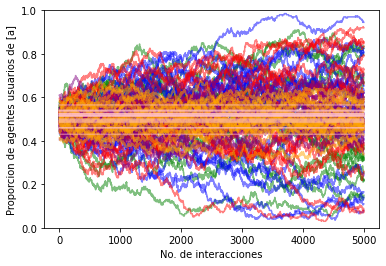

In [38]:
# Graficamos las diferentes simulaciones realizadas 
colors = ['green', 'blue', 'red', 'purple', 'orange', 'pink']
for j, st in enumerate(results):
    for simulation in st:
        plt.plot(simulation, color = colors[j], alpha = .5)
plt.ylim(0,1)
plt.xlabel('No. de interacciones')
plt.ylabel('Proporcion de agentes usuarios de [a]')

Notar que en algunas escenarios (verdes, azules, rojas), que se caracterizan por tener pocos agentes
tercos, si se puede dar una convergencia de ideas. Sin embargo,
este no siempre es el caso, incluso cuando no hay agentes tercos en la población (color verde)